# INTEX-NA (2004)

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

matplotlib.rcParams.update({'font.size': 16})

Populating the interactive namespace from numpy and matplotlib


## Retrieve GEOS-Chem data along flighttracks

GC output: Tracers past 67 are not assigned.

In [113]:
cpdc = {'NOx': 'NOx', 'PAN': 'TRA_003', 'HNO3': 'TRA_007', \
        'R4N2': 'TRA_017', 'NH3': 'TRA_030', 'O3': 'TRA_002', \
        'CO': 'TRA_004', 'H2O2': 'TRA_008', 'SO2': 'TRA_026', \
        'NOy': 'NOy'}

In [114]:
plog = 'Planeflight.log.'
dat = pd.read_csv('../../planeflights/' + plog + str(dates[0]), sep='\s*', engine='python')
adat = pd.read_csv('../../planeflights/' + plog + str(20040801), sep='\s*', engine='python')
itx_mon = dat[dat["TYPE"]=='INTEX']
itx_jul = itx_mon
itx_aug = adat[adat["TYPE"]=='INTEX']

for dt in dates:
    day_dat = 0
    itx_day = 0
    day_dat = pd.read_csv('../../planeflights/' + plog + str(dt), sep='\s*', engine='python')
    itx_day = day_dat[day_dat["TYPE"]=="INTEX"]
    itx_mon = pd.concat([itx_mon, itx_day])
    if dt < 20040801:
        itx_jul = pd.concat([itx_jul, itx_day])
    else:
        itx_aug = pd.concat([itx_aug, itx_day])
    
itx_mon['NOx'] = itx_mon['NO'] + itx_mon['NO2']
itx_jul['NOx'] = itx_jul['NO'] + itx_jul['NO2']
itx_aug['NOx'] = itx_aug['NO'] + itx_aug['NO2']

In [115]:
list(itx_mon)

['GMAO_ABSH',
 'GMAO_NDENS',
 'GMAO_PSFC',
 'GMAO_SURF',
 'GMAO_TEMP',
 'GMAO_TPAUS',
 'GMAO_UWND',
 'GMAO_VWND',
 'HHMM',
 'HNO2',
 'HO2',
 'I',
 'J',
 'L',
 'LAT',
 'LON',
 'NO',
 'NO2',
 'NO3',
 'NOy',
 'O',
 'O3',
 'OH',
 'POINT',
 'PRESS',
 'TRA_001',
 'TRA_002',
 'TRA_003',
 'TRA_004',
 'TRA_005',
 'TRA_006',
 'TRA_007',
 'TRA_008',
 'TRA_009',
 'TRA_010',
 'TRA_011',
 'TRA_012',
 'TRA_013',
 'TRA_014',
 'TRA_015',
 'TRA_016',
 'TRA_017',
 'TRA_018',
 'TRA_019',
 'TRA_020',
 'TRA_021',
 'TRA_022',
 'TRA_023',
 'TRA_024',
 'TRA_025',
 'TRA_026',
 'TRA_027',
 'TRA_028',
 'TRA_029',
 'TRA_030',
 'TRA_031',
 'TRA_032',
 'TRA_033',
 'TRA_034',
 'TRA_035',
 'TRA_036',
 'TRA_037',
 'TRA_038',
 'TRA_039',
 'TRA_040',
 'TRA_041',
 'TRA_042',
 'TRA_043',
 'TRA_044',
 'TRA_045',
 'TRA_046',
 'TRA_047',
 'TRA_048',
 'TRA_049',
 'TRA_050',
 'TRA_051',
 'TRA_052',
 'TRA_053',
 'TRA_054',
 'TRA_055',
 'TRA_056',
 'TRA_057',
 'TRA_058',
 'TRA_059',
 'TRA_060',
 'TRA_061',
 'TRA_062',
 'TRA_063',

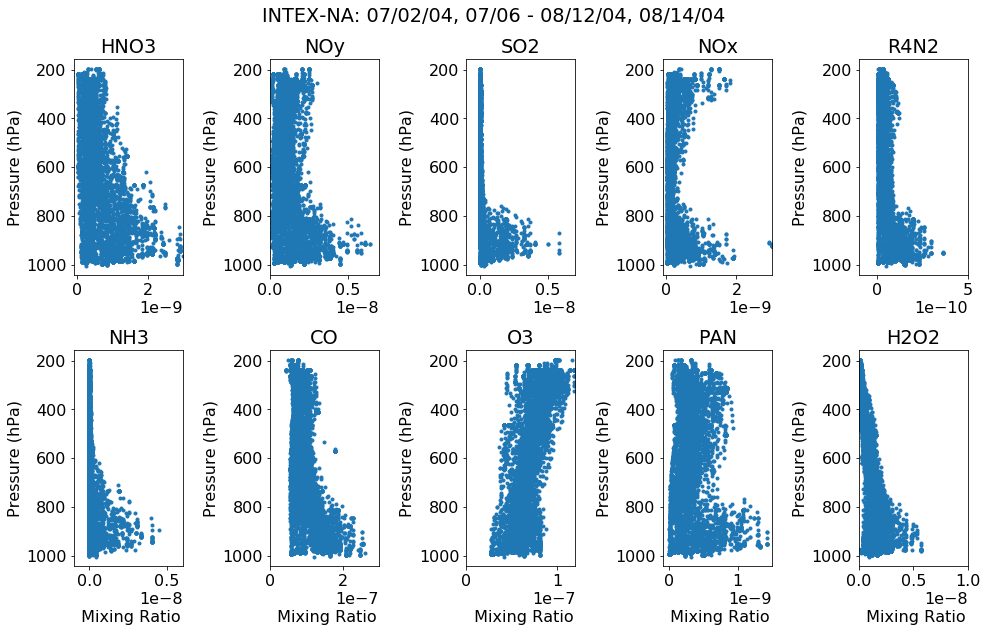

In [116]:
fig = plt.figure(figsize=[14,9])
for idx, cp in enumerate(cpdc):
    fig.add_subplot(2,5 ,idx+1)
    plt.scatter(np.ma.masked_invalid(itx_mon[cpdc[cp]]), itx_mon['PRESS'], marker = '.')
    plt.gca().invert_yaxis()
    plt.title(cp)
    
    if cp == 'HNO3':
        plt.xlim([-0.1e-9, 3.0e-9])
    elif cp == 'SO2':
        plt.xlim([-0.1e-8, 0.7e-8])
    elif cp == 'NOx':
        plt.xlim([-0.1e-9, 3.0e-9])
    elif cp == 'R4N2':
        plt.xlim([-0.1e-9, 5e-10])
    elif cp == 'NH3':
        plt.xlim([-0.1e-8, 0.6e-8])
    elif cp == 'CO':
        plt.xlim([0., 3.0e-7])
    elif cp == 'O3':
        plt.xlim([0., 1.2e-7])
    elif cp == 'NOy':
        plt.xlim([0., 0.7e-8])
    elif cp == 'PAN':
        plt.xlim([-0.1e-9, 1.5e-9])
    elif cp == 'H2O2':
        plt.xlim([0., 1.0e-8])
    
    if idx==0 or 5:
        plt.ylabel('Pressure (hPa)')
    if idx>4:
        plt.xlabel('\n Mixing Ratio')
        
plt.suptitle('INTEX-NA: 07/02/04, 07/06 - 08/12/04, 08/14/04')
plt.tight_layout()
plt.subplots_adjust(top=0.9)


## Retrieve aircraft observations

In [117]:
d1 = [20040702]
d2 = np.arange(20040706, 20040732)
d3 = np.arange(20040801, 20040813)
d4 = [20040814]

datest = np.append(d1, d2)
datest = np.append(datest, d3)
dates = np.append(datest, d4)

pdat = 'Planeflight.dat.'
odat = pd.read_csv('../../flighttracks/2004/07/' + pdat + str(dates[0]) + '.csv', sep=',', engine='python')
aodt = pd.read_csv('../../flighttracks/2004/08/' + pdat + str(20040801) + '.csv', sep=',', engine='python')

itx_obm = odat[odat['campaign']=='INTEX-NA']
itx_obj = itx_obm
itx_oba = aodt[aodt['campaign']=='INTEX-NA']

for dt in dates:
    day_dat = 0
    idx_day = 0
    if dt < 20040801:
        day_dat = pd.read_csv('../../flighttracks/2004/07/' + pdat + str(dt) + '.csv', sep=',', engine='python')
        itx_obd = day_dat[day_dat['campaign']=='INTEX-NA']
        itx_obj = pd.concat([itx_obj, itx_obd])
    else:
        day_dat = pd.read_csv('../../flighttracks/2004/08/' + pdat + str(dt) + '.csv', sep=',', engine='python')
        itx_obd = day_dat[day_dat['campaign']=='INTEX-NA']
        itx_oba = pd.concat([itx_oba, itx_obd])
    itx_obm = pd.concat([itx_obm, itx_obd])

In [118]:
list(itx_obm)

['ABSHUM',
 'ALPHA',
 'ALTR',
 'ANs',
 'APAN',
 'Acetaldehyde_PTRMS',
 'Acetic_acid_PTRMS',
 'Acetone_PTRMS',
 'Acetonitrile_PTRMS',
 'Acetylene_pptV',
 'AmbTemp',
 'Ammonium_._20_Deg._C._._1_Atm.',
 'Ammonium_.micro_g.m_STP.',
 'Ammonium_Errors_.micro_g.m_STP.',
 'Attack',
 'BETA',
 'Baro_Altitude',
 'Be.7',
 'Benzene_PTRMS',
 'Benzene_UCIGC',
 'C2Cl4',
 'C2O4',
 'C8_aromatics_PTRMS',
 'C9_aromatics_PTRMS',
 'CABINPRESSURE.MB.',
 'CABINTEMPERATURE.DEGC.',
 'CABIN_ALT',
 'CCl4',
 'CFC.11',
 'CFC.113',
 'CFC.114',
 'CFC.12',
 'CH2Br2',
 'CH2Cl2',
 'CH2O_NCAR',
 'CH2O_URI',
 'CH3Br',
 'CH3CCl3',
 'CH3Cl',
 'CH3I',
 'CH3OOH_URI',
 'CH4_UCIGC',
 'CHBr3',
 'CHCl3',
 'CLEAR',
 'CLOUDY',
 'CLOUD_EXTINCTION',
 'CN_counter_...cm3.',
 'CO',
 'CO10sec',
 'CO2',
 'CO2_mixing_ratio',
 'CORRECTEDEASTVEL.MS.1.',
 'CORRECTEDLATITUDE.DEGREES.',
 'CORRECTEDLONGITUDE.DEGREES.',
 'CORRECTEDNORTHVEL.MS.1.',
 'CO_UCIGC',
 'Ca',
 'Calcium_._20_Deg._C._._1_Atm.',
 'Chloride_._20_Deg._C._._1_Atm.',
 'Cl',
 'Cl

The observations include all tracers drawn from the model simulations (CO, $H_2O_2$, $HNO_3$, NOx, $O_3$, PAN, $SO_2$, ANs and NOy), except $NH_3$.

In [119]:
# Variables in common:
vrs = {'NOx': ['NOx', 'NOx'], 'HNO3': ['HNO3_CIT', 'TRA_007'], \
       'ANs': ['ANs', 'TRA_017'], 'O3': ['O3', 'TRA_002'], \
       'CO': ['CO', 'TRA_004'], 'H2O2': ['H2O2_CIT', 'TRA_008'], \
       'PAN': ['PAN', 'TRA_003'], 'SO2': ['SO2', 'TRA_026'], \
       'NOy': ['NOy', 'NOy']}


## Compare model and aircraft observations

##### Plot vertical profiles (campaign and monthly mean)

In [120]:
def vertprof_intex(mod, obs, fac, title):
    # Organize data
    
    # Calculate mean pressure over several intervals
    # Observations
    obs['NOy'] = np.ma.masked_invalid(obs['NO']) + np.ma.masked_invalid(obs['NO2']) + np.ma.masked_invalid(obs['HNO3_CIT'])/1e12 +\
                     np.ma.masked_invalid(obs['ANs'])/1e12 + np.ma.masked_invalid(obs['HO2NO2'])/1e12 +\
                     np.ma.masked_invalid(obs['NO3'])/1e12
    obs['NOx'] = np.ma.masked_invalid(obs['NO']) + \
                     np.ma.masked_invalid(obs['NO2'])
    obs_s = obs.sort_values('press')
    olen = len(obs_s)
    oprs = obs_s['press'].values.reshape(fac, olen/fac)
    mopr = np.mean(oprs, axis=1)
    
    # Model
    mod_s = mod.sort_values('PRESS')
    tlen = len(mod_s) # truncate to allow more pressure levels
    pres = mod_s['PRESS'].values.reshape(fac, tlen/fac)
    mprs = np.mean(pres, axis=1)
    
    
    # Plotting
    fig = plt.figure(figsize=[12,16])
    for idx, cp in enumerate(vrs):
        fig.add_subplot(3, 3, idx+1)
        
        # Mask observations where negative in order to take interval mean
        if cp=='CO' or cp=='O3' or cp=='NOx' or cp=='NOy': # units MR
            odat = (obs_s[vrs[cp][0]].values.reshape(fac, olen/fac))
        else: # units pptv
            odat = (obs_s[vrs[cp][0]].values.reshape(fac, olen/fac))/ 1e12
        modt = np.ma.masked_invalid(odat) # some values also NaN
        mask = modt < 0
        modt = np.ma.masked_array(modt, mask)
        mmod = np.mean(modt, axis=1)
        osdv = np.std(modt, axis=1)
            
        # Model interval mean
        mdat = mod_s[vrs[cp][1]].values.reshape(fac, tlen/fac)
        mmmd = np.mean(mdat, axis=1)
    #    msdv = np.std(mmmd, axis=1)
        
        # Plotting
        if cp=='NOx':
            plt.plot(mmmd[2:], mprs[2:], color='r', marker= '.', label='GC')
            plt.errorbar(mmod[2:], mopr[2:], color='b', xerr=osdv[2:], marker= '*', label='DC8')
        elif cp=='ANs':
            plt.plot(mmmd[7:], mprs[7:], color='r', marker= '.', label='GC')
            plt.errorbar(mmod[7:], mopr[7:], color='b', xerr=osdv[7:], marker= '*', label='DC8')
        else:
            plt.plot(mmmd, mprs, color='r', marker= '.', label='GC')
            plt.errorbar(mmod, mopr, color='b', xerr=osdv, marker= '*', label='DC8')
        plt.gca().invert_yaxis()
        plt.ylim([1000, 200])
        if cp == 'HNO3':
            plt.title(r'$HNO_3$')
        elif cp == 'H2O2':
            plt.title(r'$H_2O_2$')
        elif cp == 'NH3':
            plt.title(r'$NH_3$')
        elif cp == 'O3':
            plt.title(r'$O_3$')
        elif cp == 'SO2':
            plt.title(r'$SO_2$')
        else:
            plt.title(cp)
        
        if idx==0 or idx==3 or idx==6:
            plt.ylabel('Pressure (hPa)')
        if idx > 5:
            plt.xlabel('\n Mixing Ratio')
        if idx == 1:
            plt.legend(loc='best')
        
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    return fig

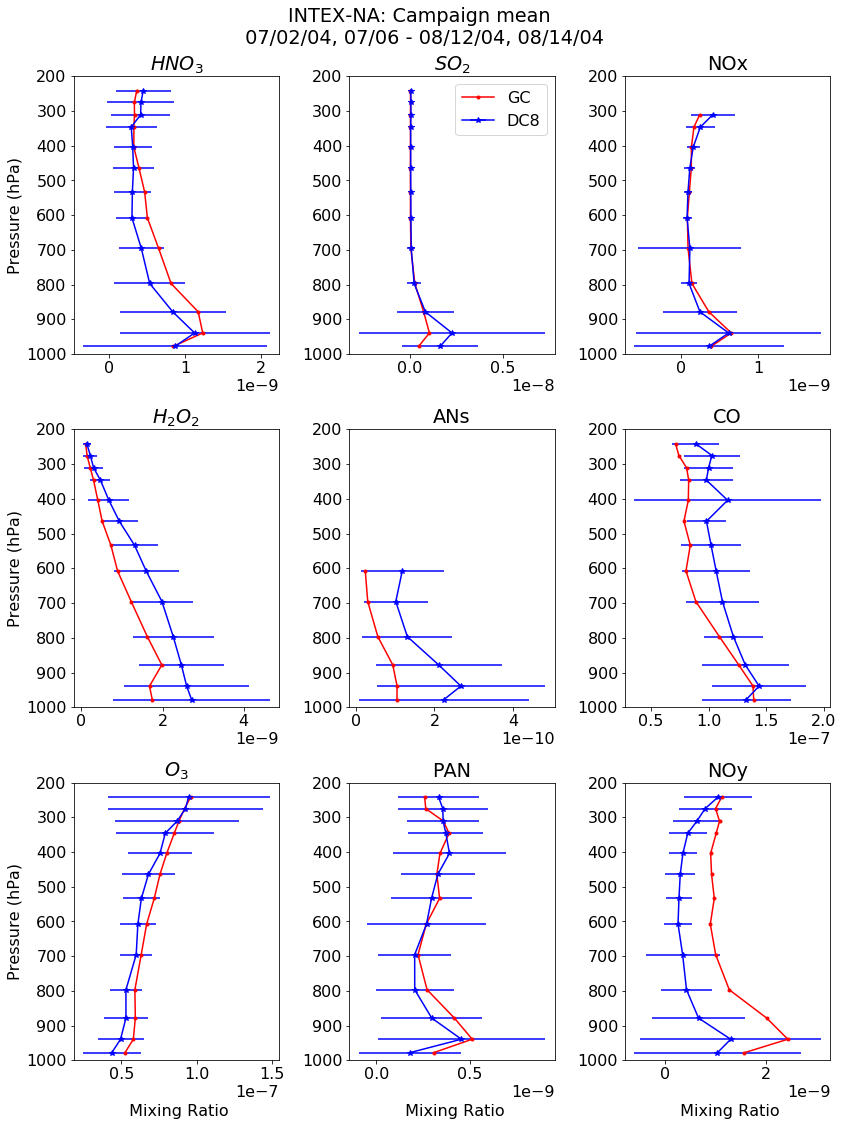

In [121]:
c = vertprof_intex(itx_mon, itx_obm, 13, 'INTEX-NA: Campaign mean \n 07/02/04, 07/06 - 08/12/04, 08/14/04')
plt.savefig('intex/intex_prof.jpg')

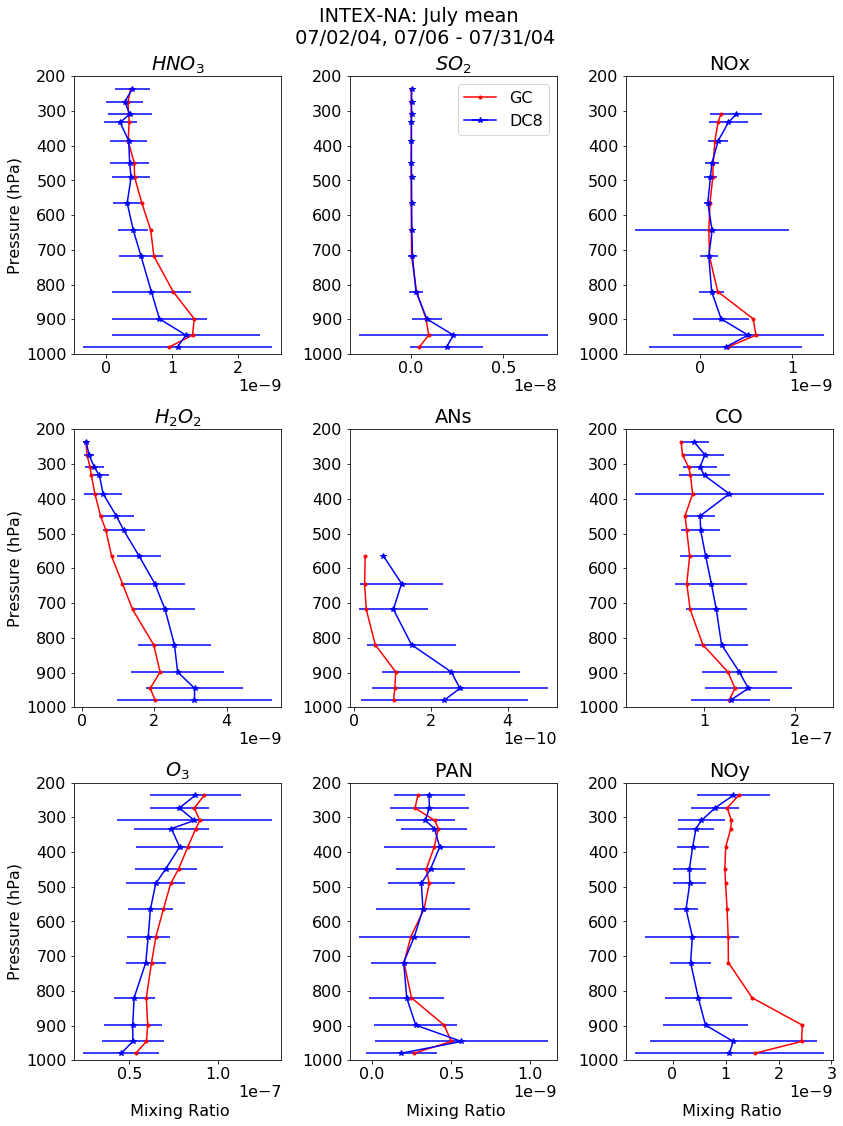

In [122]:
j = vertprof_intex(itx_jul[1:], itx_obj[1:], 14, 'INTEX-NA: July mean \n 07/02/04, 07/06 - 07/31/04')
plt.savefig('intex/intex_jul.jpg')

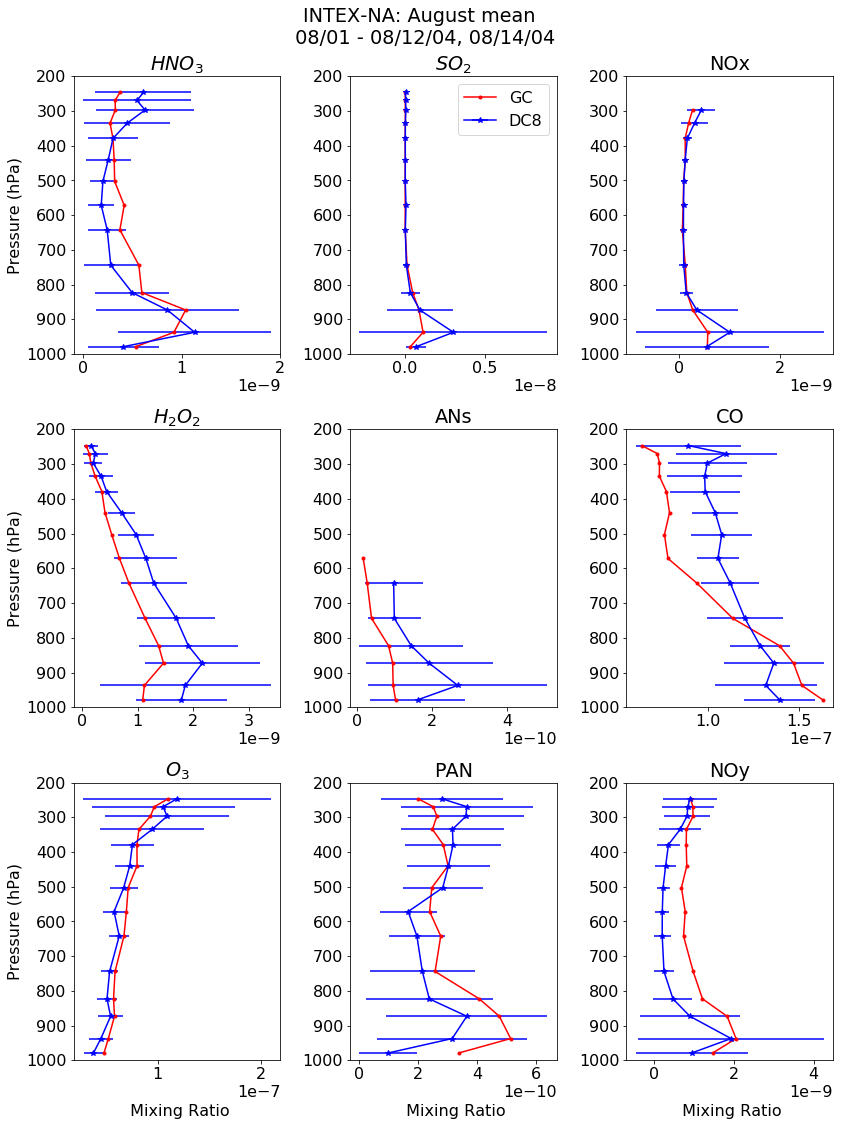

In [123]:
a = vertprof_intex(itx_aug, itx_oba, 14, 'INTEX-NA: August mean \n 08/01 - 08/12/04, 08/14/04')
plt.savefig('intex/intex_aug.jpg')

## Subset aircraft data by meteorological observations

In [124]:
def metsub(dat, varn, cmap, desc):
    fig = plt.figure(figsize=[12,12])
    for idx, var in enumerate(vrs):
        fig.add_subplot(3, 3,idx+1)
        met = dat[varn]
        
        if var=='NOx':
            adj_var = np.ma.masked_invalid(dat[vrs[var][0]])[2:]
            adj_prs = dat['press'][2:]
            adj_met = met[2:]
        else:
            adj_var = np.ma.masked_invalid(dat[vrs[var][0]])
            adj_prs = dat['press']
            adj_met = met
        
        if var=='CO' or var=='O3' or var=='NOx' or var=='NOy': # units MR
            adj_var = adj_var
        else: # units pptv
            adj_var = adj_var/ 1e12
        
        # Plotting
        obj = plt.scatter(adj_var, adj_prs, c=adj_met, cmap=cmap, marker = '.')
        
        # Formatting
        plt.gca().invert_yaxis()
        plt.ylim([1000, 200])
        rng = adj_var.max() - adj_var.min()
        if var == 'CO':
            plt.xlim([0., adj_var.max()])
        else:
            plt.xlim([-0.05 * rng, adj_var.max()])
        
        if var == 'HNO3':
            plt.title(r'$HNO_3$')
        elif var == 'SO2':
            plt.title(r'$SO_2$')
        elif var == 'O3':
            plt.title(r'$O_3$')
        elif var == 'H2O2':
            plt.title(r'$H_2O_2$')
        else:
            plt.title(var)
                    
        if idx==0 or idx==3 or idx==6:
            plt.ylabel('Pressure (hPa)')
        if idx>5:
            plt.xlabel('\n Mixing Ratio')
            
    cbar_ax = fig.add_axes([0.95, 0.15, 0.04, 0.7])
    fig.colorbar(obj, cax=cbar_ax)
    plt.suptitle(desc + '\n INTEX-NA: 07/02/04, 07/06 - 08/12/04, 08/14/04')
    plt.tight_layout()
    plt.subplots_adjust(top=0.87, right=0.9)

### Temperature

##### Ambient Temperature

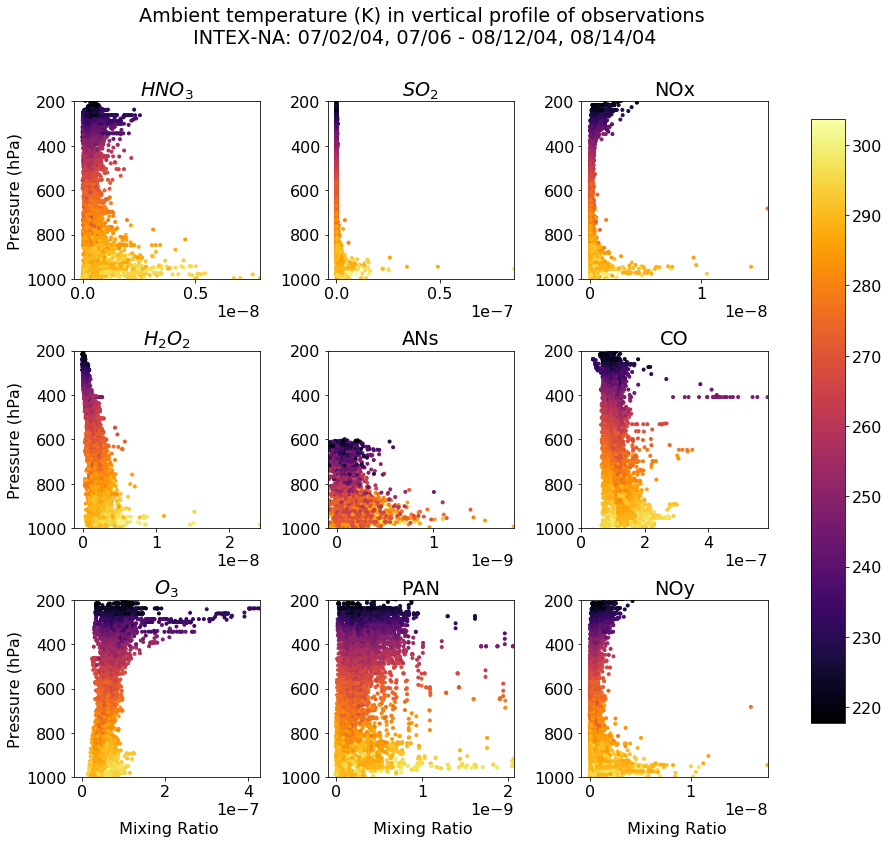

In [125]:
metsub(itx_obm, 'TEMPERATURE', 'inferno', 'Ambient temperature (K) in vertical profile of observations')
plt.savefig('intex/intex_at.jpg')

##### Surface Temperature

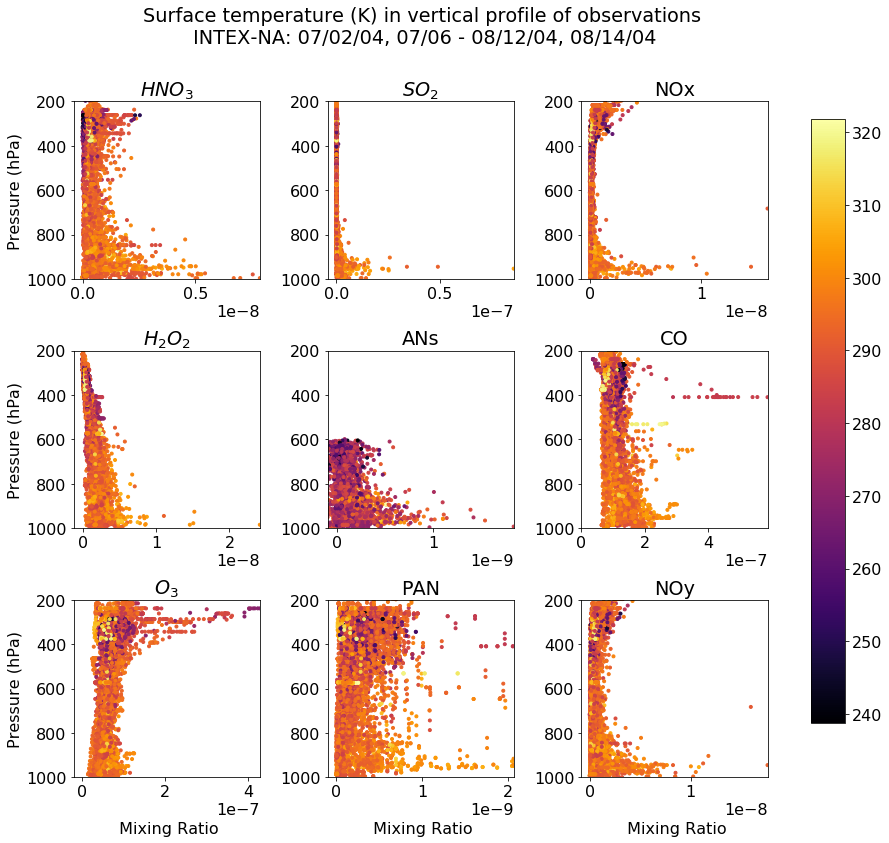

In [126]:
metsub(itx_obm, 'IR_SURF_TEMP', 'inferno', 'Surface temperature (K) in vertical profile of observations')
plt.savefig('intex/intex_st.jpg')

##### Dew Point

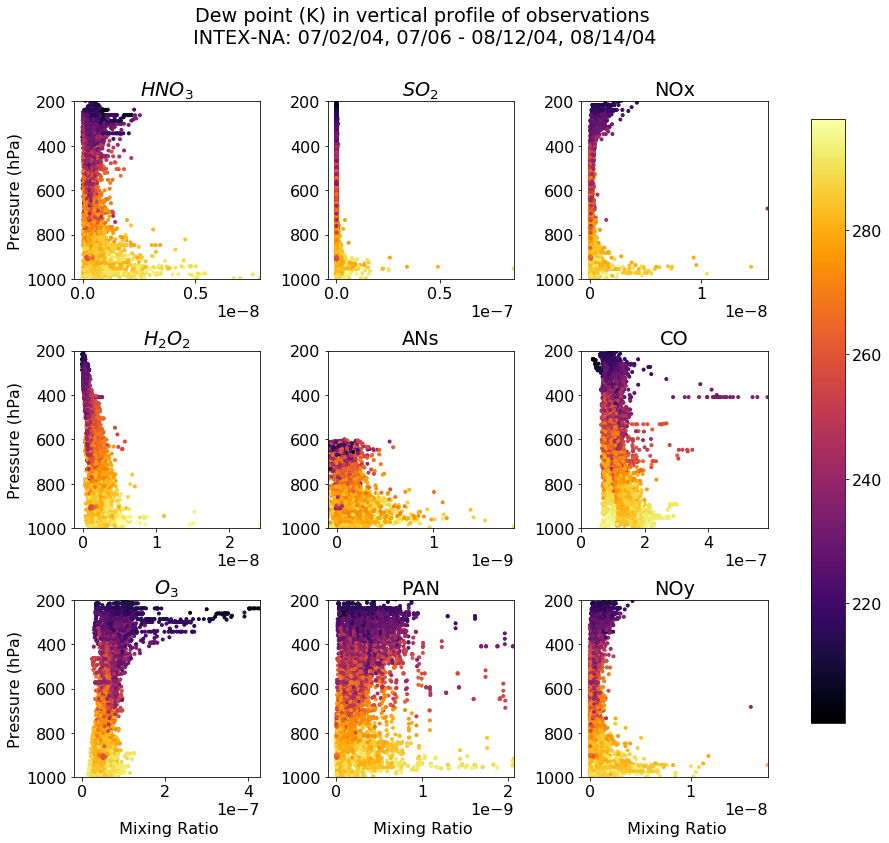

In [127]:
metsub(itx_obm, 'DP_PROJ', 'inferno', 'Dew point (K) in vertical profile of observations')
plt.savefig('intex/intex_dp.jpg')

### Moisture Indicators

##### Relative Humidity

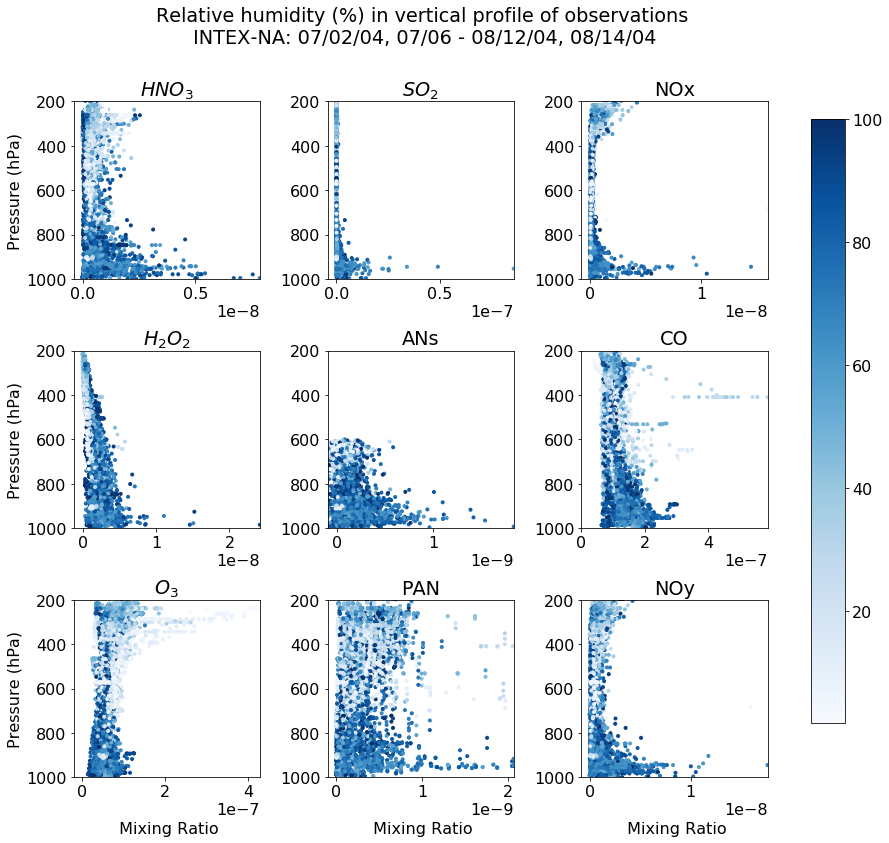

In [128]:
metsub(itx_obm, 'REL_HUMIDITY_H2O', 'Blues', 'Relative humidity (%) in vertical profile of observations')
plt.savefig('intex/intex_rh.jpg')

##### $H_2O$ Mixing Ratio

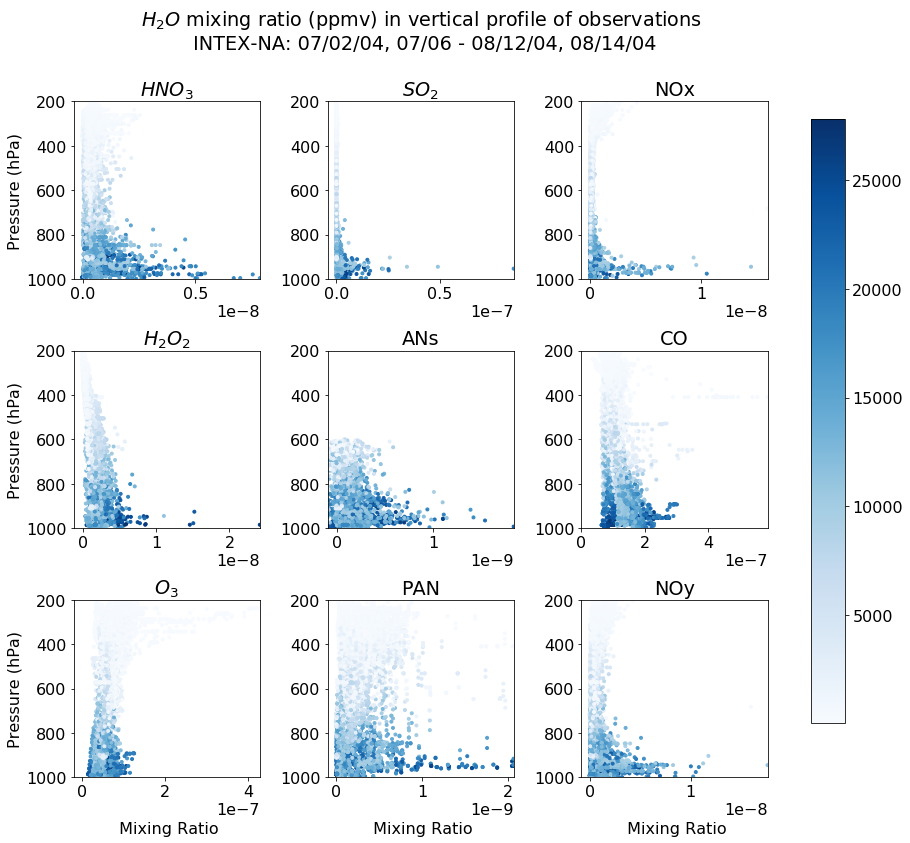

In [129]:
metsub(itx_obm, 'H2O.v._DLH', 'Blues', r'$H_2O$' + ' mixing ratio (ppmv) in vertical profile of observations')
plt.savefig('intex/intex_mr.jpg')

##### Vapor Pressure Deficit

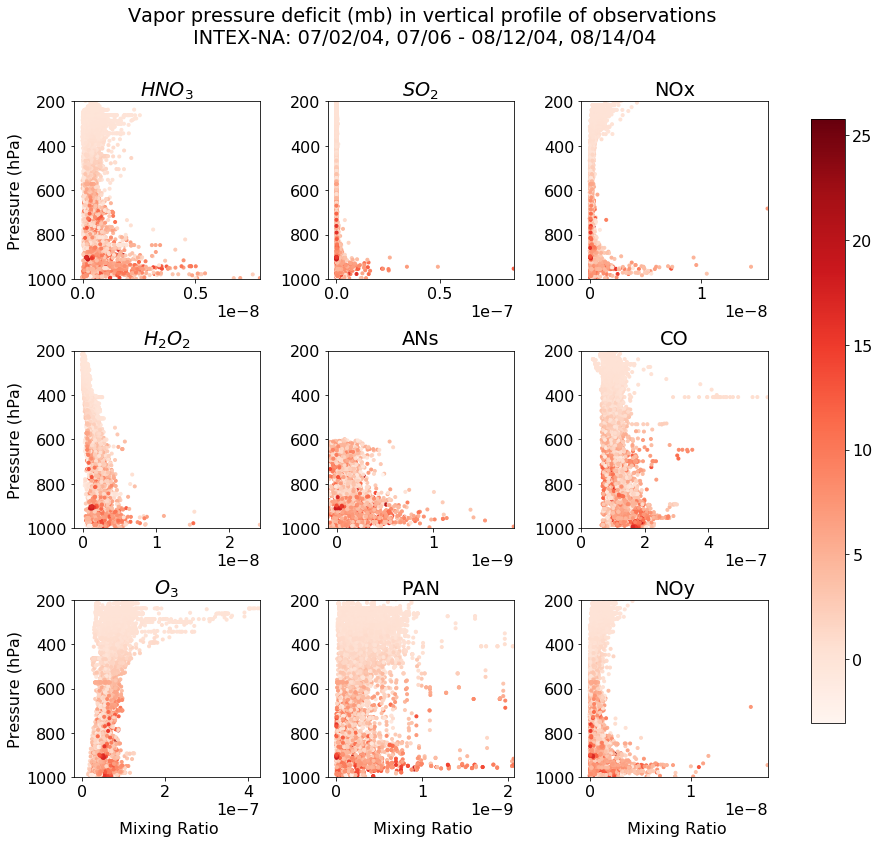

In [130]:
itx_obm['VPD'] = itx_obm['SAT_VAPOR_PRESSURE_H2O'] - itx_obm['VAPOR_PRESSURE_H2O']
metsub(itx_obm, 'VPD', 'Reds', 'Vapor pressure deficit (mb) in vertical profile of observations')
plt.savefig('intex/intex_vpd.jpg')

No radiation variables were measured on INTEX-NA.